In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [76]:
#Importing the datasets

df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [77]:
#Shape of the two datasets

print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [78]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## *Checking the information & missing values 

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [82]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## *Data Preprocessing

### 1.Filling the missing values

In [84]:
df_train['Cabin'].fillna(0,inplace=True)      #Filling Cabin Column

In [85]:
def transform_cabin(cabin):
    if cabin!=0:
        return 1
    else:
        return 0

In [86]:
df_train['Cabin'] = df_train['Cabin'].apply(transform_cabin)

In [87]:
df_test['Cabin'].fillna(0,inplace=True)
df_test['Cabin'] = df_test['Cabin'].apply(transform_cabin)

In [88]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [89]:
df_train['Age'].fillna(method='backfill',inplace=True)    #Filling Age Column
df_test['Age'].fillna(method='pad',inplace=True)

In [90]:
#Filling Fare column in test

df_test['Fare'].fillna(0,inplace=True)

In [91]:
#Filling Embarked column in train

df_train['Embarked'].fillna('S',inplace=True)

In [92]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


### 2.EDA

In [93]:
# Checking the relation of the columns with output

import matplotlib.pyplot as plt

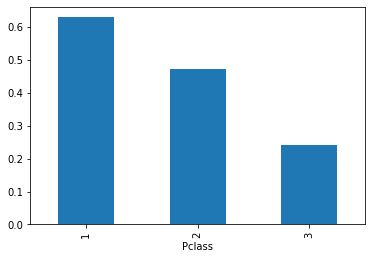

In [94]:
df_train.groupby('Pclass').mean()['Survived'].plot(kind='bar')

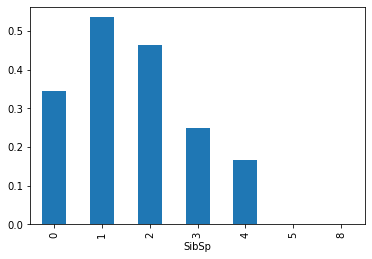

In [95]:
df_train.groupby('SibSp').mean()['Survived'].plot(kind='bar')

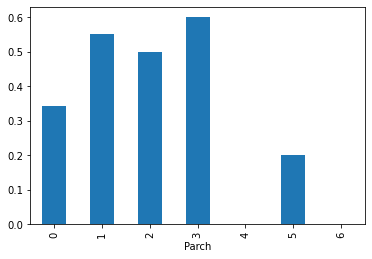

In [96]:
df_train.groupby('Parch').mean()['Survived'].plot(kind='bar')

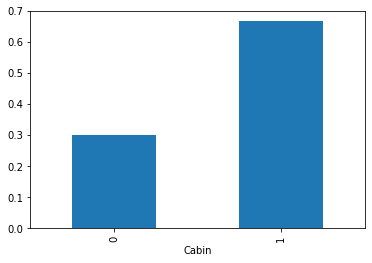

In [97]:
df_train.groupby('Cabin').mean()['Survived'].plot(kind='bar')

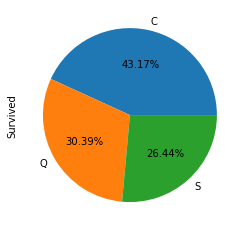

In [98]:
df_train.groupby('Embarked').mean()['Survived'].plot(kind='pie' , autopct='%1.2f%%')

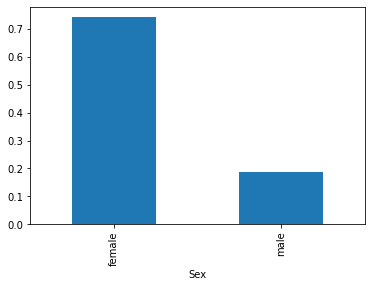

In [99]:
df_train.groupby('Sex').mean()['Survived'].plot(kind='bar')

In [100]:
#Dropping some columns

df_train.drop(columns=['Name','Ticket'],inplace=True)
df_test.drop(columns=['Name','Ticket'],inplace=True)

In [101]:
#Creating a new columns Family

df_train['Family']=df_train['SibSp']+df_train['Parch']+1
df_test['Family']=df_test['SibSp']+df_test['Parch']+1

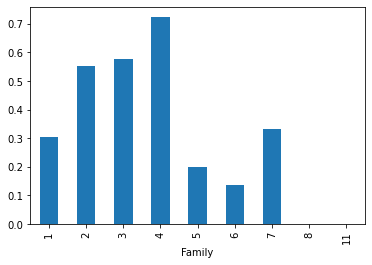

In [102]:
df_train.groupby('Family').mean()['Survived'].plot(kind='bar')

In [103]:
#New column Family_type

def family_type(size):
    if size==1:
        return 'Alone'
    elif size<=4:
        return 'Small'
    else:
        return 'Large'

In [104]:
df_train['Family_type'] = df_train['Family'].apply(family_type)
df_test['Family_type'] = df_test['Family'].apply(family_type)

In [105]:
df_train.drop(columns=['PassengerId','SibSp','Parch','Family'],inplace=True)
df_test.drop(columns=['PassengerId','SibSp','Parch','Family'],inplace=True)

In [106]:
#LabelEncoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [107]:
df_train['Sex'] = encoder.fit_transform(df_train['Sex'])
df_test['Sex'] = encoder.fit_transform(df_test['Sex'])

In [108]:
df_train['Embarked'] = encoder.fit_transform(df_train['Embarked'])
df_test['Embarked'] = encoder.fit_transform(df_test['Embarked'])

In [109]:
df_train['Family_type'] = encoder.fit_transform(df_train['Family_type'])
df_test['Family_type'] = encoder.fit_transform(df_test['Family_type'])

In [110]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_type
0,0,3,1,22.0,7.2500,0,2,2
1,1,1,0,38.0,71.2833,1,0,2
2,1,3,0,26.0,7.9250,0,2,0
3,1,1,0,35.0,53.1000,1,2,2
4,0,3,1,35.0,8.0500,0,2,0


In [111]:
df_test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_type
0,3,1,34.5,7.8292,0,1,0
1,3,0,47.0,7.0000,0,2,2
2,2,1,62.0,9.6875,0,1,0
3,3,1,27.0,8.6625,0,2,0
4,3,0,22.0,12.2875,0,2,2


## *Fetching X and y

In [112]:
X = df_train.iloc[:,1:].values
y = df_train.iloc[:,0].values

## *Train_Test Split

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [196]:
print(X_train.shape)
print(y_train.shape)

(712, 7)
(712,)


In [121]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [122]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [123]:
y_pred=clf.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7988826815642458

## *Applying ANN

In [136]:
# Importing keras

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [186]:
model = Sequential()

In [187]:
X_train.shape

(712, 7)

In [188]:
# Adding layers

#adding the first hidden layer
model.add(Dense(units = 5 ,activation ='softmax' , input_dim = X.shape[1]))

model.add(Dense(units = 5 , activation ='softmax'))

#adding output layer
model.add(Dense(units = 1))


In [189]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [190]:
# Compliling ANN

model.compile(optimizer='Adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [191]:
model.fit(X_train, y_train, batch_size=10, epochs=100 , verbose=1)

Epoch 1/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 2/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 3/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 4/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 5/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 6/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 7/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 8/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 9/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 10/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 11/

72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 84/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 85/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 86/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 87/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 88/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 89/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 90/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 91/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 92/100
72/72 [==============================] - 0s 1ms/step - loss: 5.9143 - accuracy: 0.6166
Epoch 93/100


In [192]:
y_pred = model.predict_classes(X_test)

In [193]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [194]:
len(y_pred)

179